# Problem 3: Singular Value Decomposition and Eigenfaces

In [5]:
import cv2
import zipfile
import numpy as np
import matplotlib.pyplot as plt
# Please upload the attface.zip file to the workspace first.
# Refer to the canvas assignment page for a quick guide on how to do upload it.
faces = {}
# load the images dataset
with zipfile.ZipFile("attface.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue # not a face picture
        with facezip.open(filename) as image:
            # opencv load the filename files
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

faceimages = np.asarray(list(faces.values())[0:400:2])
faceimages_test = np.asarray(list(faces.values())[1:401:2])
print(faceimages.shape)
# 3d stands for (index,height,width)
# To make it clear:
# faceimages is a 3d array where the first index is to index the images
# Second and third are to index the image height and width directions.

def plot_single_face(img):
  img_arr = np.reshape(img, (112, 92))
  plt.figure()
  plt.imshow(img_arr, cmap='gray')
  plt.show()



(200, 112, 92)


## Problem 3.1 Constructing the face-image matrix


### $\color{red}{\text{>Important!!!! The following code block is an example for reshaping the the first image into a column vector.<}}$

[[48]
 [49]
 [45]
 ...
 [47]
 [46]
 [46]]


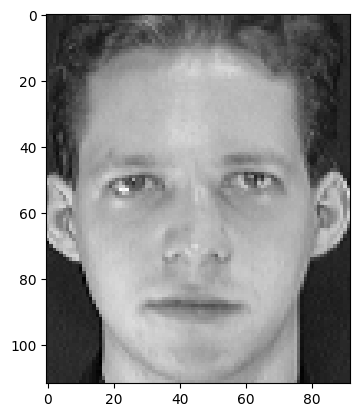

In [6]:
# Check this code! You need to utilize it in your loop for problem 3.1!!!
row_vect = faceimages[[0],:,:] # Take out the 0th face image
col_vect = row_vect.reshape((10304,1))
print(col_vect)
plot_single_face(col_vect)

(10304, 200)


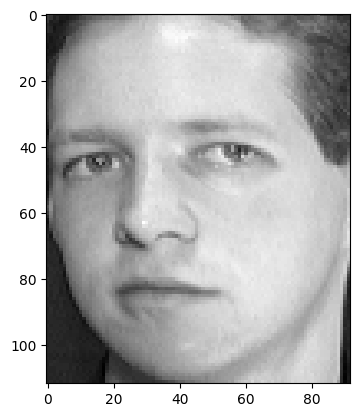

In [7]:
# The shape of faceimages are (200, 112, 92)
# where faceimage[i, :, :] is the i-th face image.
# Please generate the matrix A whose size is (10304, 200) according to face image
# The column vectors of matrix A will stands for the face images.

# Here you can reshape the 3-D array directly followed by a transpose operation
# if you're comfortable with multi-dimensional reshaping operations,
# OR
# you can generate A by writing a for loop [Recommended] (112*92 = 10304)
# please make sure each colums of A represents a face image

########################Your codes start here ###############################
A = np.empty((112 * 92, 200))

for i in range(200):
    A[:, i] = faceimages[i].reshape(-1)

print(A.shape)
##############################################################################
plot_single_face(A[:, 2]) # Make sure the plot is a human face

## 3.2 PCA on the face-image matrix

In [40]:
def plot_eigenface(B_hat):
  k = B_hat.shape[1]
  fig, axes = plt.subplots(5,4,sharex=True,sharey=True,figsize=(8,10))
  for i in range(k):
    img_tmp = np.reshape(B_hat[:, i], (112, 92))
    axes[i//4][i%4].imshow(img_tmp, cmap="gray")
  plt.show()

In [108]:
# Step(a) center the face-image matrix A according to equation(7) on Page 6
###########################Your codes start here############################
n = A.shape[1]

mean_face = np.mean(A, axis=1, keepdims=True)

ones_vector = np.ones((n, 1))
centering_term = (1 / n) * np.dot(A, ones_vector.dot(ones_vector.T))

A_bar = A - centering_term
#############################################################################

In [43]:
# Step(b) Perform SVD on A_bar
# This step may take up to 1 min or longer, please be patient to wait.
################Your codes start here########################################
U, sigma, V_T = np.linalg.svd(A_bar, full_matrices=False)

print(U.shape, sigma.shape, V_T.shape)
#############################################################################

(10304, 200) (200,) (200, 200)


In [107]:
# Step (c) Using the top k=20 principal components to contruct B_hat and W_hat
# in equation (9) on Page 7
# Hint: Please use np.diag to generate a diagonal matrix if you don't know
# how to generate \Sigma matrix based on eigenvalues (sigma)
################Your codes start here########################################
k = 20

U_k = U[:, :k]
sigma_k = np.diag(sigma[:k])
V_k_T = V_T[:k, :]

B_hat = np.dot(U_k, sigma_k)
W_hat = V_k_T

print(B_hat.shape, W_hat.shape)
#############################################################################

(10304, 20) (20, 200)


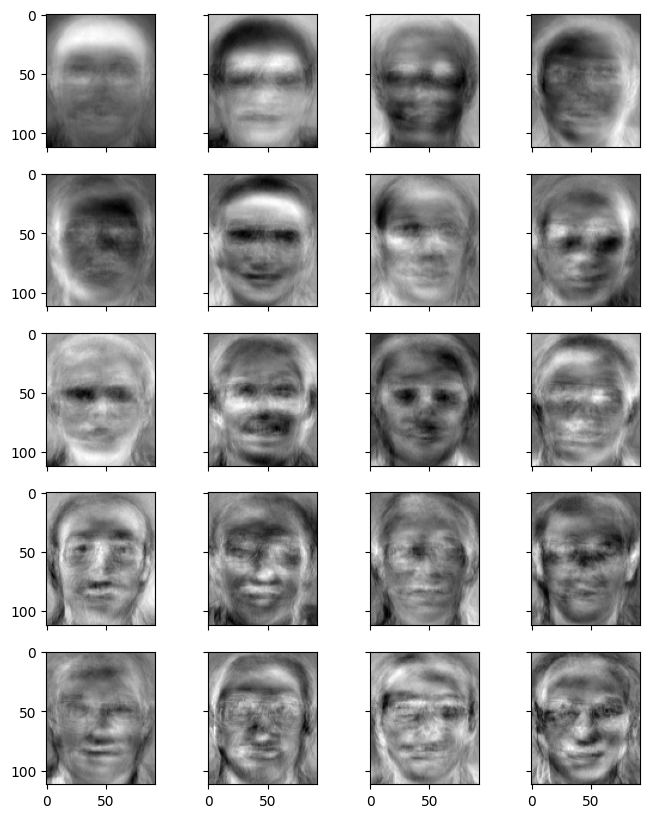

In [46]:
# Ensure the shape of B_hat before plotting
plot_eigenface(B_hat)

## Problem 3.3 Face recognition based on eigenfaces

In [106]:
def visualize_recognition(ind, test_img, faceimages):
  plt.figure()
  plt.subplot(1, 2, 1)
  plt.imshow(np.squeeze(test_img, axis=0), cmap="gray") # Updated here
  plt.subplot(1, 2, 2)
  best_match = faceimages[ind, :, :]
  plt.imshow(best_match, cmap="gray")
  plt.show()

In [105]:
# Here are 3 test images
test_img1 = faceimages_test[[15], :, :]
test_img2 = faceimages_test[[35], :, :]
test_img3 = faceimages_test[[75], :, :]

In [104]:
# Step(a) Vectorize 3 test images
###########################Your codes start here############################
z_1 = test_img1.reshape(-1, 1)
z_2 = test_img2.reshape(-1, 1)
z_3 = test_img3.reshape(-1, 1)
#############################################################################

In [103]:
# Step (b) Center each of the 3 vectors according to equation (10)
###########################Your codes start here############################
z_1_bar = z_1 - np.mean(z_1)
z_2_bar = z_2 - np.mean(z_2)
z_3_bar = z_3 - np.mean(z_3)
#############################################################################

In [102]:
# Step (c) Compute the representations of the 3 vectors with respect to the B_hat
# according to equation (11)
###########################Your codes start here############################
w_1 = np.dot(B_hat.T, z_1_bar)
w_2 = np.dot(B_hat.T, z_2_bar)
w_3 = np.dot(B_hat.T, z_3_bar)
#############################################################################

In [101]:
# Step (d) for each corresponding vector for the 3 test images,
# find its nearest neighbor in the training set: faceimages .
###########################Your codes start here############################
ind_1 = np.argmin(np.linalg.norm(W_hat.T - w_1.T, axis=1))
ind_2 = np.argmin(np.linalg.norm(W_hat.T - w_2.T, axis=1))
ind_3 = np.argmin(np.linalg.norm(W_hat.T - w_3.T, axis=1))
#############################################################################

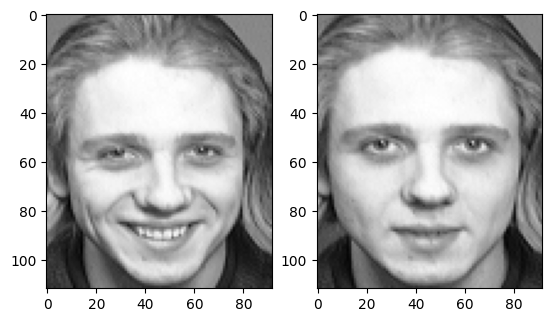

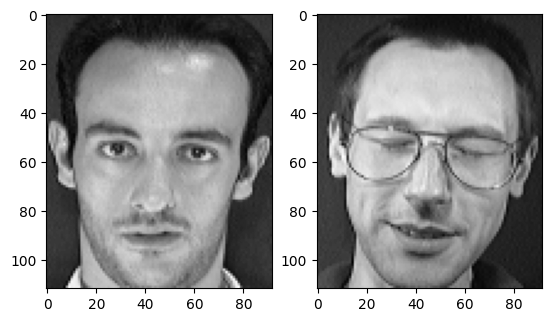

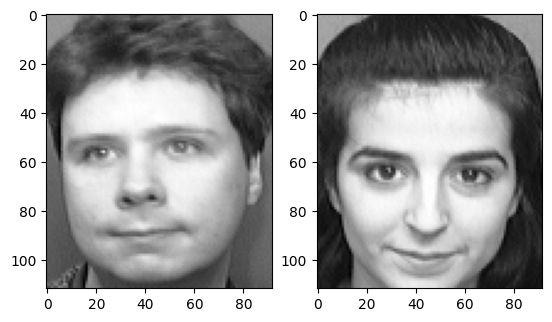

In [100]:
visualize_recognition(ind_1, test_img1, faceimages)
visualize_recognition(ind_2, test_img2, faceimages)
visualize_recognition(ind_3, test_img3, faceimages)